# Discriminat Analysis (강재영)

## 판별 분석 (Discriminant Analysis)
### · 두 개 이상의 모집단에서 추출된 표본들의 정보를 통하여 이 표본들이 어느 모집단에서 추출된 것인지 결정하는 기준을 찾는 분석법
### · 새로운 개체의 집단을 판별하거나 개체의 유사성을 계산하여 유사한 개체끼리 군집화하는 개체 유도 기법

### 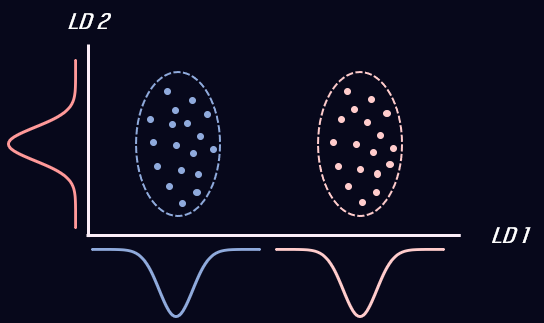
### 위와 같은 두 군집이 있을 때, LD1 축에 투영된 판별 벡터가 LD2 축에 투영된 판별 벡터보다 좋은 기준으로 구분되었다고 할 수 있다.

## - 판별 변수 (Discriminant Variable)
### · 어떤 집단에 속하는지 판별하기 위한 독립 변수 중 판별력이 높은 변수
### · 판별 변수를 선택할 때, 판별 기여도 등 다양한 것을 고려해야 하지만 상관관계가 적은 변수를 택하는 것이 효과적임
### · ex) 보험 가입 승인 여부 판별 (두 개의 변수 사용)
### -> 나이와 연령대를 사용하는 것보다 나이와 가족력 여부를 사용하는 것이 두 변수 사이의 상관관계가 적음

## - 판별 함수 (Discriminant Function)
### · 선택한 판별 변수들을 이용하여 분류의 기준이 되는 판별 점수를 도출하는 새로운 함수
### · 판별 함수에 새로운 데이터를 대입하여, 해당 데이터가 어떤 집단에 속하는지 판별

## - 판별 점수 (Discriminant Score)
### · 대상이 어떤 집단에 속하는지 판별하기 위해 그 대상의 판별 변수들의 값을 판별 함수를 대입하여 구한 값
### 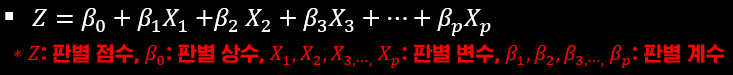

## - 표본의 크기
### · 전체 표본의 크기는 독립 변수의 개수의 3배 이상이어야 함
### · 종속 변수의 집단 각각의 표본 크기 중 최소 크기가 독립 변수 개수보다 커야 함
#### (데이터의 전체 개수보다, 가장 적은 집단의 표본 수에 의해 판별력이 좌우됨)

## - 판별 분석의 단계
### 1) 케이스가 속한 집단을 구분하는 데 기여할 수 있는 독립 변수 찾기
### 2) 집단을 구분하는 기준이 되는 판별 함수 (선형결합 / 비선형결합) 도출
### 3) 판별 함수에 의해 (학습 데이터) 분류의 정확도 분석
### 4) 판별 함수를 이용하여 새로운 데이터 (테스트 데이터) 가 속하는 클래스 예측

## - 선형 판별 분석 (LDA)
### · 선형 판별 분석의 가정
### :  데이터의 각 클래스 집단이 정규분포 형태를 가지고, 비슷한 형태의 공분산 구조를 가져야 함
#### * 공분산: 2개의 확률변수의 상관 정도를 나타내는 값
#### 공분산의 형태
#### 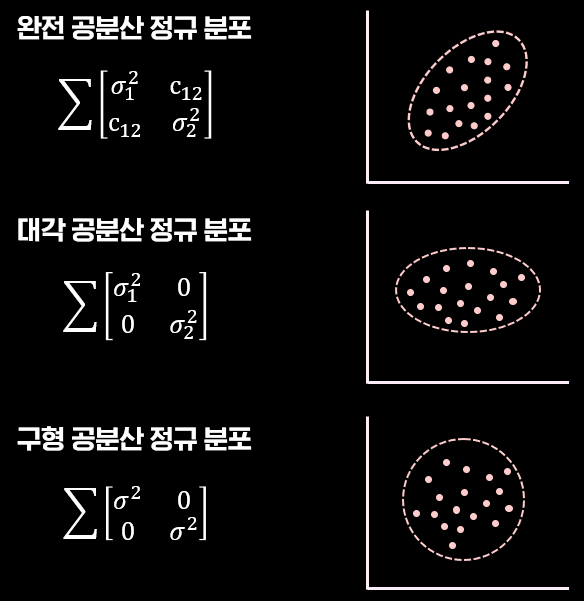
### · 차원 축소
### : 여러 개의 판별 변수를 이용하여 만들어진 판별 점수 축에 의해 판별을 진행하기에, 이 과정에서 차원이 축소됨
#### (2차원 데이터의 경우, 한 축(1차원)에 사영하여 차원이 축소됨)
### · 결정 경계 (Decision Boundary)
### : 사영(projection) 축에 직교하는 경계선
### 각 클래스 집단의 평균 판별 점수와 차이가 크고, 각 클래스 집단의 분산이 작은 지점을 결정 경게로 지정
#### (사영 데이터의 분포에서, 겹치는 영역이 작은 결정 경계를 선택)
## - LDA 장점
### · 변수 (x) 간 공분산 구조를 활용
### · 공분산 구조 가정에 약간 위반되어도 비교적 robust하게 동작함
####  (이상치에 의한 영향을 비교적 적게 받음)
## - LDA 단점
### · 가장 작은 그룹의 샘플 수가 설명 변수의 개수보다 많아야 함
### · 정규분포 가정에 크게 벗어나는 경우 잘 동작하지 못함
### · 범주 (y) 사이에 공분산 구조가 많이 다른 경우 반영하지 못함
### -> 이차 판별 분석(QDA)을 통해 해결 가능

## - 이차 판별 분석 (QDA)
### · K (범주의 수) 와 관계없이 y의 범주별로 서로 다른 공분산 구조를 가진 경우에 활용
### 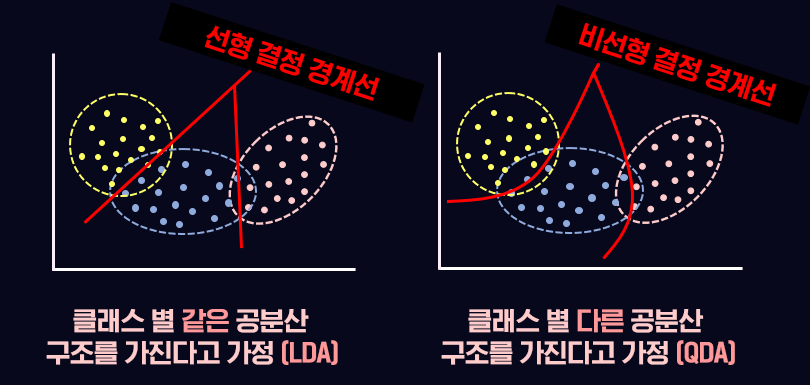
## - QDA 장점
### ·서로 다른 공분산 데이터 분류 가능 (비선형 분류 가능)
## - QDA 단점
### · 샘플이 많이 필요함
### · 독립 변수(설명 변수)의 개수가 많을 경우 추정해야하는 모수가 많아짐 -> 연산량이 큼



### -- 신용카드 사용자 연체 예측 -- 
#### https://www.dacon.io/competitions/official/235713/data 데이터 사용

In [463]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [464]:
train = pd.read_csv("C:\\Users\\tom11\\credit\\train.csv")
test = pd.read_csv("C:\\Users\\tom11\\credit\\test.csv")
submission = pd.read_csv("C:\\Users\\tom11\\credit\\sample_submission.csv")

In [465]:
#데이터 셋 정보 확인
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


### train

#### · gender: 성별

#### · car: 차량 소유 여부

#### · reality: 부동산 소유 여부

#### · child_num: 자녀 수

#### · income_total: 연간 소득

#### · income_type: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

#### · edu_type: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

#### · family_type: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

#### · house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

#### · DAYS_BIRTH: 출생일 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

#### · DAYS_EMPLOYED: 업무 시작일 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 / 양수 값은 고용되지 않은 상태를 의미

#### · FLAG_MOBIL: 핸드폰 소유 여부

#### · work_phone: 업무용 전화 소유 여부

#### · phone: 가정용 전화 소유 여부

#### · email: 이메일 소유 여부

#### · occy_type: 직업 유형

#### · family_size: 가족 규모

#### · begin_month: 신용카드 발급 월 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

#### · credit: 사용자의 신용카드 대금 연체(연체 일수, 횟수)를 기준으로 한 신용도 / 낮을수록 높은 신용의 신용카드 사용자를 의미

In [466]:
#데이터 셋 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [467]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [468]:
#결측치 개수 확인
train.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [469]:
train = train.drop("occyp_type", axis = 1)
test =  test.drop("occyp_type", axis = 1)

### - 데이터 시각화

### · income_type(소득 분류), edu_type(교육 수준), family_type(결혼 여부), house_type(생활 방식) 에 대한 정리 필요

In [470]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [471]:
train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [472]:
train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [473]:
train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [474]:
train['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

In [475]:
#'F'와 'M'을 각각 '0'과 '1'로 변환
train['gender'] = train['gender'].replace(['F','M'], [0,  1])
test['gender'] = test['gender'].replace(['F','M'], [0,  1])

<AxesSubplot:title={'center':'Gender Rate'}, ylabel='gender'>

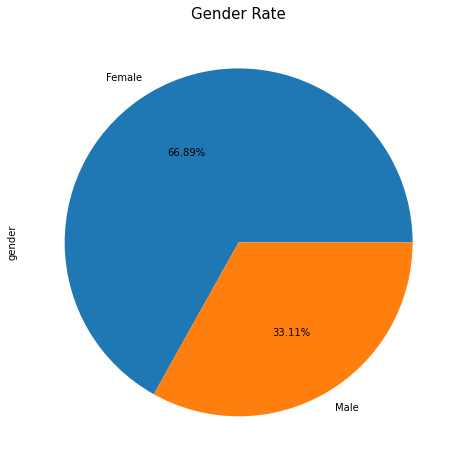

In [476]:
#성별에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Gender Rate', fontsize=15)
train['gender'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['Female', 'Male'])

#### -> 여자의 비율이 남자보다 약 2배 많음

In [477]:
# DAYS_BIRTH 변환 작업 (음수로 된 일 수 -> 나이)
train['new_age'] = round(abs(train['DAYS_BIRTH'])/365.5,0).astype(np.int32)
test['new_age'] = round(abs(test['DAYS_BIRTH'])/365.5,0).astype(np.int32)
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,new_age
0,0,0,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0,38
1,1,0,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0,31
2,2,1,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0,52
3,3,0,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0,41
4,4,0,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0,41


In [478]:
train['new_age'].value_counts()

39    873
37    825
34    811
40    809
28    795
41    792
29    772
42    768
30    761
38    743
33    742
35    734
44    713
32    707
36    686
45    676
31    655
51    648
27    642
46    628
43    626
49    625
47    613
48    612
60    610
57    603
52    591
54    588
55    567
50    564
58    558
59    548
56    541
53    511
61    487
64    432
62    412
63    397
26    356
25    355
65    328
66    184
24    173
23    168
67    142
68     38
22     36
21      6
69      6
Name: new_age, dtype: int64

Text(0.5, 0, 'Age')

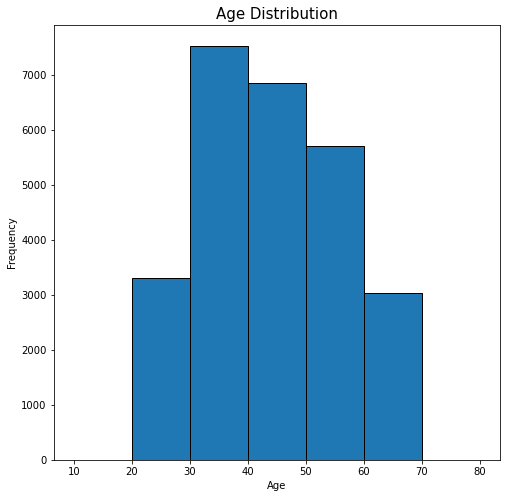

In [479]:
#나이에 대한 분포를 히스토그램으로 표현
plt.figure(figsize=(8,8))
plt.title('Age Distribution', fontsize=15)
train['new_age'].plot.hist(bins=range(10,81,10), edgecolor='k')
plt.xlabel('Age')

#### -> 30~50대의 비율이 높음

In [480]:
train['car'].value_counts()

N    16410
Y    10047
Name: car, dtype: int64

In [481]:
#'N'와 'Y'을 각각 '0'과 '1'로 변환
train['car'] = train['car'].replace(['N', 'Y'], [0, 1])
test['car'] = test['car'].replace(['N', 'Y'], [0, 1])

<AxesSubplot:title={'center':'Car'}, ylabel='car'>

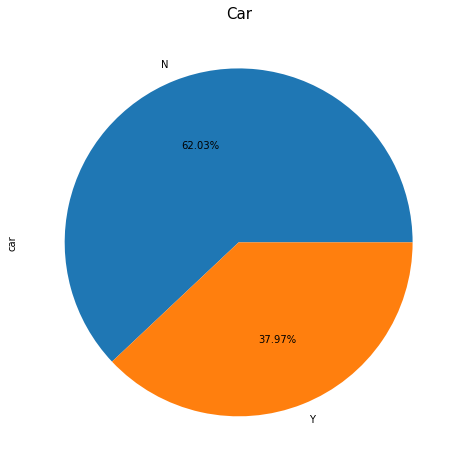

In [482]:
#차 소유 여부에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Car', fontsize=15)
train['car'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['N', 'Y'])

#### -> 차를 소유하지 않은 사람이 약 1.7배 더 많음

In [483]:
train['reality'].value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

In [484]:
#'N'와 'Y'을 각각 '0'과 '1'로 변환
train['reality'] = train['reality'].replace(['N', 'Y'], [0, 1])
test['reality'] = test['reality'].replace(['N', 'Y'], [0, 1])

<AxesSubplot:title={'center':'Reality'}, ylabel='reality'>

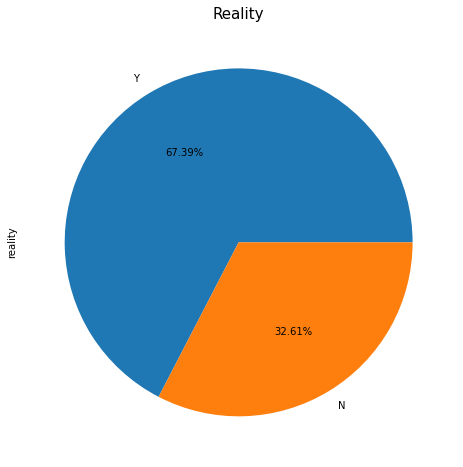

In [485]:
#부동산 소유 여부에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Reality', fontsize=15)
train['reality'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['Y', 'N'])

#### -> 부동산을 소유한 사람이 약 2배 더 많음

In [486]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

Text(0.5, 0, 'num')

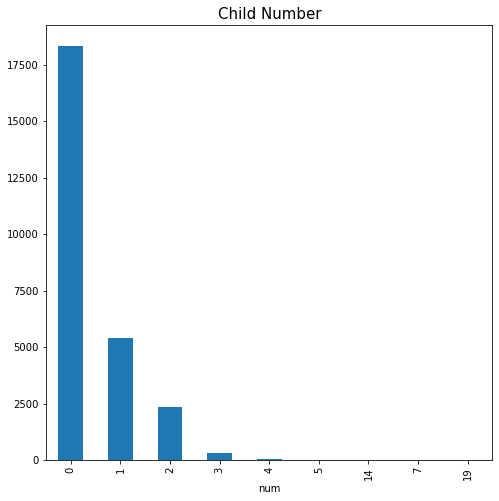

In [487]:
#자녀 수에 대한 분포를 바 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Child Number', fontsize=15)
train["child_num"].value_counts().plot.bar()
plt.xlabel('num')

#### -> 3명 이상의 자녀 수 비율이 매우 적기 때문에 2명 이상을 2로 합칠 필요

In [488]:
train.loc[train['child_num'] > 2, 'child_num'] = 2

Text(0.5, 0, 'num')

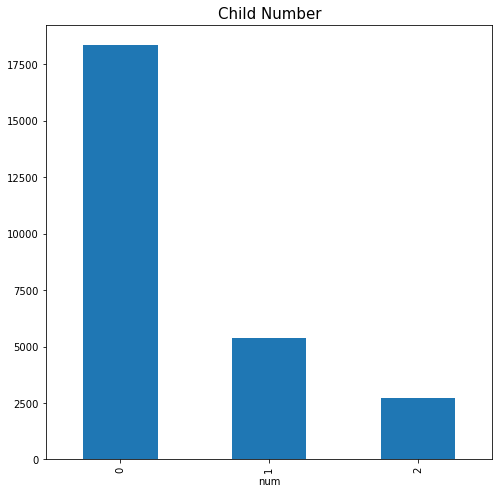

In [489]:
#자녀 수에 대한 분포를 바 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Child Number', fontsize=15)
train["child_num"].value_counts().plot.bar()
plt.xlabel('num')

#### -> 2명 이상의 자녀 수를 2로 병합

In [490]:
train['income_total']

0        202500.0
1        247500.0
2        450000.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26457, dtype: float64

In [491]:
train['income_total'].min()

27000.0

In [492]:
train['income_total'].max()

1575000.0

In [493]:
train['income_total'].median()

157500.0

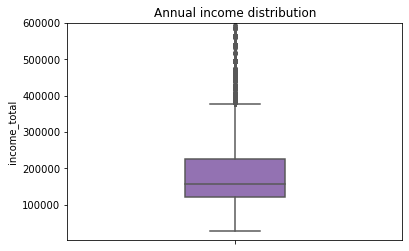

In [494]:
#연간 소득에 대한 분포를 박스 플롯으로 표현
sns.boxplot(data=train,y="income_total", width=0.3, color='tab:purple')
plt.title('Annual income distribution')
plt.ylim(2000, 600000)
plt.show()

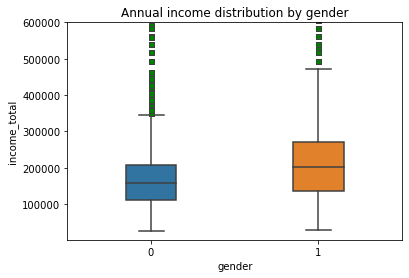

In [495]:
#남녀별 연간 소득에 대한 분포를 박스 플롯으로 표현
green = dict(markerfacecolor='g', marker='s')
sns.boxplot(data=train,y="income_total",x='gender', width=0.3,flierprops=green)
plt.title('Annual income distribution by gender')
plt.ylim(2000, 600000)
plt.show()

#### -> 남성의 연간 소득이 대체적으로 더 높음을 알 수 있음

In [496]:
it = train.groupby('income_type').count()['index']

([<matplotlib.patches.Wedge at 0x1979dd509a0>,
 [Text(-0.8890322023072816, -0.8059911558203755, 'Commercial associate'),
  Text(0.5006650959443588, -1.090566119821731, 'Pensioner'),
  Text(1.124612148825431, -0.41862574540303493, 'State servant'),
  Text(1.2935385342877739, -0.129452927014563, 'Student'),
  Text(0.05932376774807615, 1.1985327240339216, 'Working')],
 [Text(-0.5186021180125809, -0.4701615075618857, '23.44%'),
  Text(0.292054639300876, -0.6361635698960098, '16.82%'),
  Text(0.6560237534815014, -0.24419835148510372, '8.14%'),
  Text(0.7960237134078607, -0.07966333970126954, '0.03%'),
  Text(0.03460553118637775, 0.6991440890197876, '51.57%')])

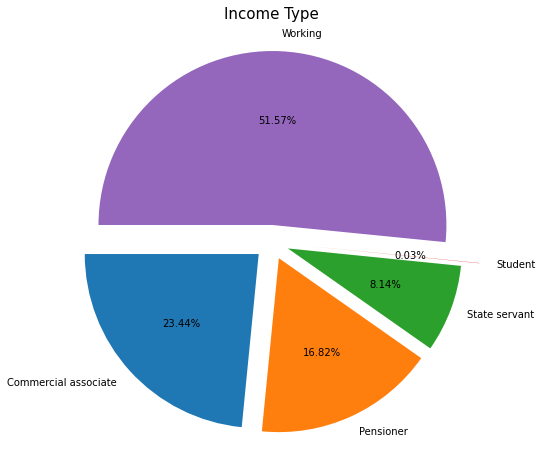

In [497]:
#소득 분류에 대한 비율을 파이 차트로 표현
explode = (0.1, 0.1, 0.1, 0.2, 0.1)
plt.figure(figsize=(8,8))
plt.title('Income Type', fontsize=15)
plt.pie(it,autopct='%1.2f%%', explode=explode,
                                            labels=it.index, startangle=180)

#### -> 대부분이 'Working'에 해당

In [498]:
et = train.groupby('edu_type').count()['index']

([<matplotlib.patches.Wedge at 0x1979ddb46a0>,
 [Text(-1.1999955246686398, -0.003277312196902718, 'Academic degree'),
  Text(-0.7866451233435781, -0.906195039668485, 'Higher education'),
  Text(0.3300114872474323, -1.2574149745747176, 'Incomplete higher'),
  Text(0.47645844895039924, -1.1013570476570165, 'Lower secondary'),
  Text(0.6435021238755976, 1.0128696937748682, 'Secondary / secondary special')],
 [Text(-0.6999973893900397, -0.001911765448193252, '0.09%'),
  Text(-0.4588763219504205, -0.5286137731399495, '27.07%'),
  Text(0.20308399215226602, -0.7737938305075186, '3.86%'),
  Text(0.2779340952210662, -0.6424582777999263, '0.97%'),
  Text(0.3753762389274319, 0.5908406547020064, '68.02%')])

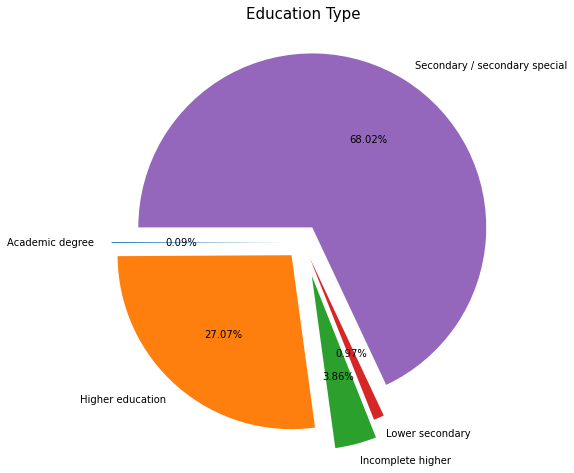

In [499]:
#교육 수준에 대한 비율을 파이 차트로 표현
explode = (0.1, 0.1, 0.2, 0.1, 0.1)
plt.figure(figsize=(8,8))
plt.title('Education Type', fontsize=15)
plt.pie(et,autopct='%1.2f%%', explode=explode,
                                            labels=et.index, startangle=180)

In [500]:
ft = train.groupby('family_type').count()['index']

([<matplotlib.patches.Wedge at 0x197a3d628b0>,
 [Text(-1.1620712414633525, -0.29931660455748615, 'Civil marriage'),
  Text(1.066186734864799, -0.5506776247482177, 'Married'),
  Text(-0.37901775098402113, 1.2435214290228433, 'Separated'),
  Text(-0.9352906645101795, 0.7518187101157477, 'Single / not married'),
  Text(-1.1897222023320833, 0.15671975394983828, 'Widow')],
 [Text(-0.6778748908536223, -0.1746013526585336, '8.02%'),
  Text(0.621942262004466, -0.3212286144364602, '68.78%'),
  Text(-0.23324169291324376, 0.7652439563217497, '5.82%'),
  Text(-0.5455862209642713, 0.4385609142341862, '13.21%'),
  Text(-0.6940046180270485, 0.091419856470739, '4.17%')])

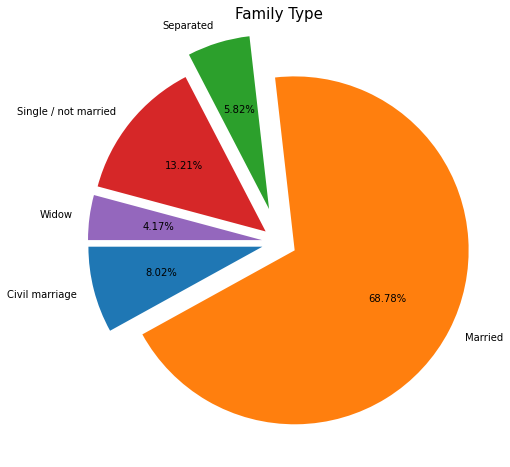

In [501]:
#결혼 여부에 대한 비율을 파이 차트로 표현
explode = (0.1, 0.1, 0.2, 0.1, 0.1)
plt.figure(figsize=(8,8))
plt.title('Family Type', fontsize=15)
plt.pie(ft,autopct='%1.2f%%', explode=explode,
                                            labels=ft.index, startangle=180)

In [502]:
ht = train.groupby('house_type').count()['index']

([<matplotlib.patches.Wedge at 0x197a3dc0880>,
 [Text(-1.1998976355863782, -0.015673675836231037, 'Co-op apartment'),
  Text(1.2392834365147172, -0.3926532363043416, 'House / apartment'),
  Text(-1.113241321450196, 0.671337292436389, 'Municipal apartment'),
  Text(-1.185439260947752, 0.5336044964237536, 'Office apartment'),
  Text(-1.2214242588544948, 0.44510985147685583, 'Rented apartment'),
  Text(-1.2855457073246541, 0.1933189964259979, 'With parents')],
 [Text(-0.6999402874253873, -0.00914297757113477, '0.42%'),
  Text(0.7626359609321337, -0.2416327608026717, '89.40%'),
  Text(-0.6850715824308898, 0.4131306414993163, '3.09%'),
  Text(-0.7295010836601551, 0.32837199779923293, '0.72%'),
  Text(-0.7516456977566119, 0.2739137547549882, '1.62%'),
  Text(-0.7911050506613256, 0.11896553626215255, '4.75%')])

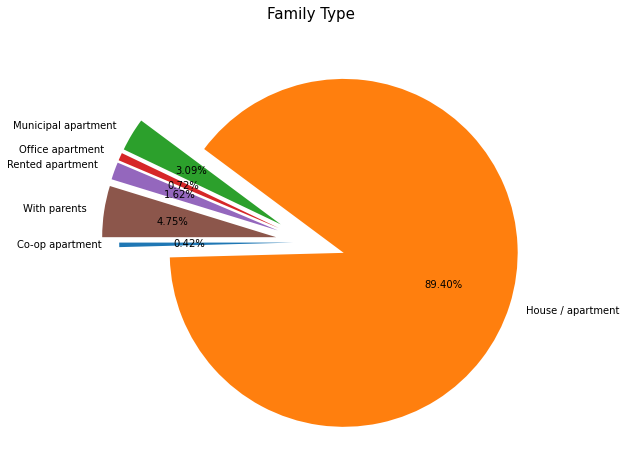

In [503]:
#생활 방식에 대한 비율을 파이 차트로 표현
explode = (0.1, 0.2, 0.2, 0.2, 0.2, 0.2)
plt.figure(figsize=(8,8))
plt.title('Family Type', fontsize=15)
plt.pie(ht,autopct='%1.2f%%', explode=explode,
                                            labels=ht.index, startangle=180)

In [504]:
#소득 분류, 교육 수준, 결혼 여부, 생활 방식에 대해 라벨인코딩
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

train['income_type'] = label_encoder.fit_transform(train['income_type'])
test['income_type'] = label_encoder.transform(test['income_type'])

train['edu_type'] = label_encoder.fit_transform(train['edu_type'])
test['edu_type'] = label_encoder.transform(test['edu_type'])

train['family_type'] = label_encoder.fit_transform(train['family_type'])
test['family_type'] = label_encoder.transform(test['family_type'])

train['house_type'] = label_encoder.fit_transform(train['house_type'])
test['house_type'] = label_encoder.transform(test['house_type'])

In [505]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,new_age
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,2.0,-6.0,1.0,38
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,3.0,-5.0,1.0,31
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,2.0,-22.0,2.0,52
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,2.0,-37.0,0.0,41
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,2.0,-26.0,2.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,-12079,-1984,1,0,0,0,4.0,-2.0,1.0,33
26453,26453,0,0,1,1,180000.0,4,1,2,1,-15291,-2475,1,0,0,0,2.0,-47.0,2.0,42
26454,26454,0,1,0,0,292500.0,4,4,0,5,-10082,-2015,1,0,0,0,2.0,-25.0,2.0,28
26455,26455,1,0,1,0,171000.0,4,2,3,1,-10145,-107,1,0,0,0,1.0,-59.0,2.0,28


In [506]:
train['DAYS_EMPLOYED'].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

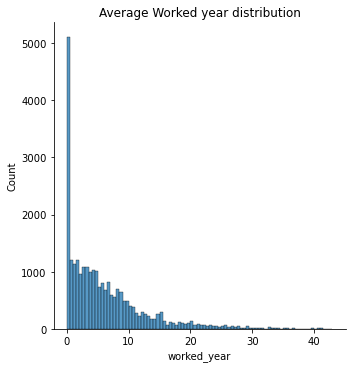

In [507]:
#업무 시작일을 연 단위로 변환
train['worked_year'] = [0 if s >=0 else round(abs(s)/365.5,2) for s in train['DAYS_EMPLOYED']]
test['worked_year'] = [0 if s >=0 else round(abs(s)/365.5,2) for s in test['DAYS_EMPLOYED']]
#업무 시작일에 대한 분포를 히스토그램으로 표현
sns.displot(data=train,x="worked_year",kind='hist')
plt.title('Average Worked year distribution')
plt.show()

In [508]:
train['FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

#### -> 핸드폰 소유 여부는 모두가 소유하고 있기 때문에 컬럼 삭제

In [509]:
train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [510]:
train['work_phone'].value_counts()

0    20511
1     5946
Name: work_phone, dtype: int64

<AxesSubplot:title={'center':'work_phone'}, ylabel='work_phone'>

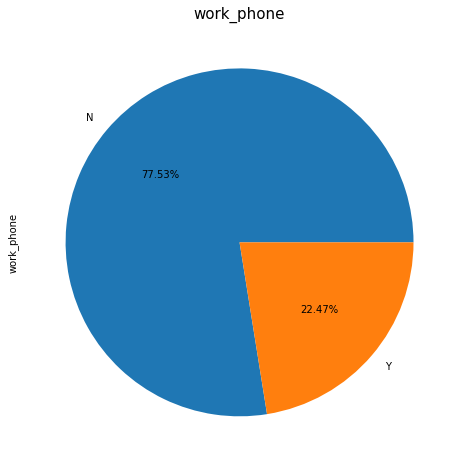

In [511]:
#업무용 전화 소유 여부에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(8,8))
plt.title('work_phone', fontsize=15)
train['work_phone'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['N', 'Y'])

#### -> 업무용 전화기를 소유하지 않은 사람의 비율이 소유한 사람의 약 3.5배

In [512]:
train['phone'].value_counts()

0    18672
1     7785
Name: phone, dtype: int64

<AxesSubplot:title={'center':'phone'}, ylabel='phone'>

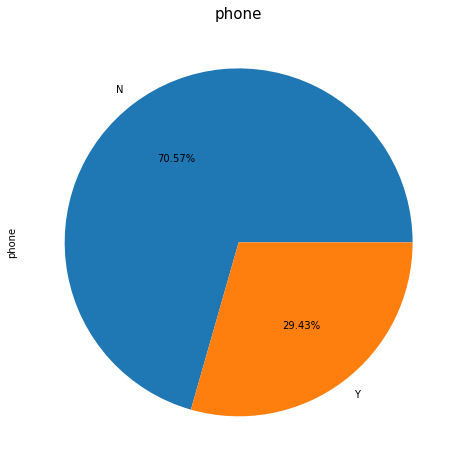

In [513]:
#가정용 전화 소유 여부에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(8,8))
plt.title('phone', fontsize=15)
train['phone'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['N', 'Y'])

#### -> 가정용 전화기를 소유하지 않은 사람이 소유한 사람의 약 2.5배

In [514]:
train['email'].value_counts()

0    24042
1     2415
Name: email, dtype: int64

<AxesSubplot:title={'center':'email'}, ylabel='email'>

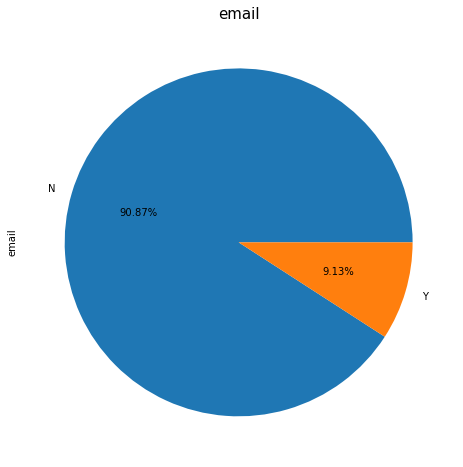

In [515]:
#가정용 전화 소유 여부에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(8,8))
plt.title('email', fontsize=15)
train['email'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['N', 'Y'])

#### -> 이메일을 보유하지 않은 사람이 보유한 사람의 약 10배 

In [516]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

Text(0.5, 0, 'num')

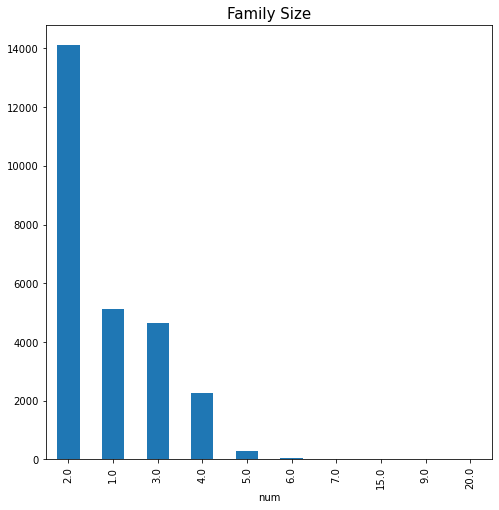

In [517]:
#가족 규모에 대한 분포를 바 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Family Size', fontsize=15)
train["family_size"].value_counts().plot.bar()
plt.xlabel('num')

##### --> 가족 규모가 5인 이상의 비율이 적기 때문에 합칠 필요

In [518]:
train.loc[train['family_size'] > 5, 'family_size'] = 5

Text(0.5, 0, 'num')

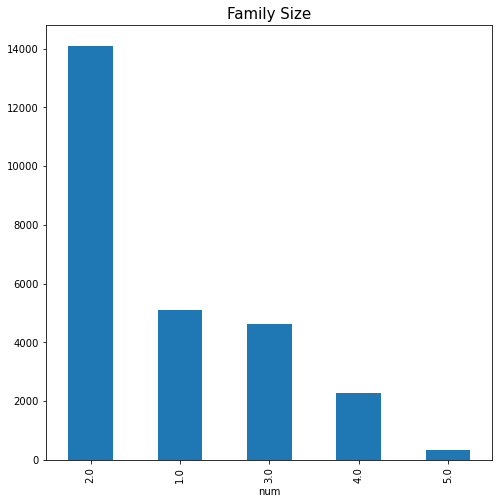

In [519]:
#가족 규모에 대한 분포를 바 차트로 표현
plt.figure(figsize=(8,8))
plt.title('Family Size', fontsize=15)
train["family_size"].value_counts().plot.bar()
plt.xlabel('num')

In [520]:
train['begin_month'].value_counts()

-7.0     662
-11.0    617
-8.0     612
-3.0     593
-6.0     591
        ... 
-58.0    244
-59.0    242
-60.0    235
 0.0     231
-57.0    228
Name: begin_month, Length: 61, dtype: int64

In [521]:
train['new_begin_month'] = [0 if s >=0 else round(abs(s)/12,2) for s in train['begin_month']]
test['new_begin_month'] = [0 if s >=0 else round(abs(s)/12,2) for s in test['begin_month']]

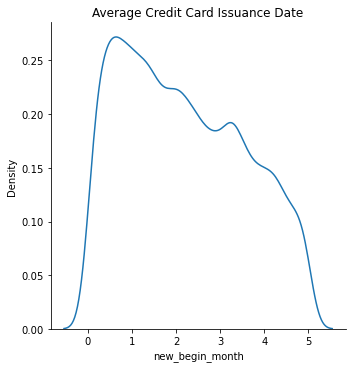

In [522]:
sns.displot(data=train,x='new_begin_month',kind='kde')
plt.title('Average Credit Card Issuance Date')
plt.show()

#### --> 신용카드를 발급한 지 얼마 지나지 않은 사람의 비율이 높음

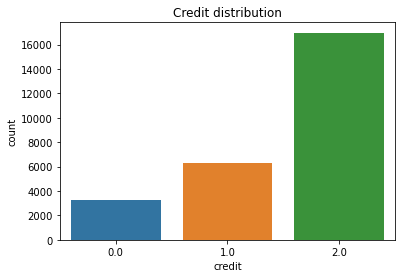

In [523]:
#신용 수준에 대한 분포를 차트로 표현
sns.countplot(data=train, x="credit")
plt.title('Credit distribution')
plt.show()

##### -> 0에 가까울수록 신용이 좋음

In [524]:
from sklearn.model_selection import train_test_split

y_train = train['credit']
X_train = train.drop("credit", axis = 1)
X_test = test.copy()
print(X_train.shape, y_train.shape, X_test.shape, submission.shape)

(26457, 19) (26457,) (10000, 19) (10000, 4)


In [525]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                 stratify = y_train, 
                 test_size = 0.3,
                 random_state = 42
                 )

### LDA 진행

In [526]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
y_pred_LDA = LDA.fit(X_train, y_train).predict(X_val)

In [527]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_LDA)

array([[   0,    1,  966],
       [   0,    4, 1876],
       [   0,    0, 5091]], dtype=int64)

In [528]:
from sklearn.metrics import accuracy_score
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, y_pred_LDA)))

accuracy:0.6418


### QDA 진행

In [529]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
y_pred_QDA = QDA.fit(X_train, y_train).predict(X_val)

In [530]:
confusion_matrix(y_val, y_pred_QDA)

array([[   0,   79,  888],
       [   0,  268, 1612],
       [   1,  277, 4813]], dtype=int64)

In [531]:
from sklearn.metrics import accuracy_score
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, y_pred_QDA)))

accuracy:0.6401


### NaiveBayes 진행

In [532]:
from sklearn.naive_bayes import BernoulliNB
clf_Ber = BernoulliNB()
clf_Ber.fit(X_train, y_train)
y_pred_Ber = clf_Ber.fit(X_train, y_train).predict(X_val)

In [533]:
confusion_matrix(y_val, y_pred_Ber)

array([[   0,   29,  938],
       [   0,   50, 1830],
       [   0,    0, 5091]], dtype=int64)

In [534]:
print('accuracy:{:0.4f}'.format(accuracy_score(y_val, y_pred_Ber)))

accuracy:0.6476
